## Business Understanding

A recommender system is an algorithm designed to suggest items to users based on various factors such as preferences, past behaviour, or similarities with other users. Recommender systems are utilized in a variety of areas including movies, music, news, social tags, and products in general. It produces a list of recommendations and there are few ways in which it can be done. Two of the most popular ways are – through collaborative filtering or through content-based filtering.

## Problem statement

The primary problem addressed by this MovieLens recommender system is the information overload faced by movie enthusiasts. With the vast number of movies available, it's challenging for users to discover new content that aligns with their preferences. This can lead to wasted time browsing through irrelevant titles and a diminished overall viewing experience.

### Stakeholders:

* Movie enthusiasts: The primary stakeholders are individuals who enjoy watching movies and are seeking personalized recommendations to enhance their viewing experience.

* Streaming platforms: These platforms can benefit from a recommender system by increasing user engagement and improving customer satisfaction.

* Film industry: By understanding viewer preferences through data-driven recommendations, the film industry can gain valuable insights into market trends and tailor future productions accordingly.

## Objectives

* Develop a movie recommendation system that accurately predicts user preferences by identify the types of movies that a user is likely to enjoy based on their past ratings

* Provide personalized recommendations to users based on their past movie ratings by tailoring recommendations to each individual user based on their specific preferences by using collaborative filtering techniques

## Data Understanding

We are using  MovieLens dataset which is a widely used benchmark dataset for collaborative filtering algorithms. It consists of four primary files:

* links.csv: Contains information about movie IDs, IMDb IDs, and TMDb IDs.

* movies.csv: Provides movie titles, genres, and release years.

* tags.csv: Includes user-provided tags or keywords associated with movies.

* ratings.csv: Contains user ratings for movies, including user IDs, movie IDs, ratings, and timestamps.

This dataset is well-suited for the movie recommender system project due to the following reasons:

* Rich Feature Set: The dataset includes essential features like user ratings, movie genres, and user-provided tags, which are crucial for building effective recommendation models.

* Large Sample Size: The dataset contains a substantial number of ratings and movies, providing a sufficient basis for training and evaluating recommendation algorithms.

* Diverse Content: The dataset covers a variety of movie genres and content, ensuring that the recommender system can cater to diverse user preferences.

* Real-World Data: The data is collected from real users and reflects actual viewing behavior, making it a realistic representation of the problem domain.

### Data Limitations

While the MovieLens dataset is valuable for building a movie recommender system, it has some limitations:

* Limited Temporal Coverage: The dataset spans a specific time period, which may not capture the most recent trends or preferences.

* Cold-Start Problem: The system may struggle to provide recommendations for new users or movies with limited ratings or tags.

* Bias in Ratings: User ratings can be influenced by various factors, such as popularity bias or groupthink, which may affect the accuracy of recommendations.

## Data loading

In [4]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## reading the files
links = pd.read_csv("../ml-latest-small/links.csv")
movies = pd.read_csv("../ml-latest-small/movies.csv")
ratings = pd.read_csv("../ml-latest-small/ratings.csv")
tags = pd.read_csv("../ml-latest-small/tags.csv")

In [12]:
# display the first few rows

links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [13]:
# display the first few rows

movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [14]:
# display the first few rows

ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [15]:
# display the first few rows

tags.head(2)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [18]:
# check for missing values

links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

We will drop the missing values because they are few.

In [22]:
# dropping the missing values

links.dropna(inplace=True)

In [23]:
#counter checking for missing values in links

links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [19]:
# check for missing values

movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [20]:
# check for missing values

ratings.isnull().sum()


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [21]:
# check for missing values

tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [116]:
# Merge the DataFrames on common columns
df = pd.merge(ratings, movies, on='movieId')
df = pd.merge(df, tags, on=['userId', 'movieId'])
df.head()


,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,old,1143424860


In [117]:
# Drop the 'timestamp_x' and 'timestamp_y' columns
df.drop(columns=['timestamp_x', 'timestamp_y'], inplace=True)

df.head()

,userId,movieId,rating,title,genres,tag
0,336,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,474,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,567,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance,moldy
4,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance,old


## Exploratory Data Analysis (EDA)

In [34]:
#checking summary of the merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 0 to 3475
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   3476 non-null   int64  
 1   movieId  3476 non-null   int64  
 2   rating   3476 non-null   float64
 3   title    3476 non-null   object 
 4   genres   3476 non-null   object 
 5   tag      3476 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 190.1+ KB


we have 6 columns with 3476 row with no missing values. The datatypes are float, integer and object.

In [37]:
#checking summary statistics for numeric columns
df.describe()

,userId,movieId,rating
count,3476.000000,3476.000000,3476.000000
mean,429.785386,28009.502301,4.016830
std,161.552990,44138.125029,0.856925
min,2.000000,1.000000,0.500000
25%,424.000000,1261.500000,3.500000
50%,474.000000,4492.000000,4.000000
75%,523.250000,45499.000000,5.000000
max,610.000000,193565.000000,5.000000


Based on the output, we can observe the following about the dataset:

* userld: There are 3476 unique users in the dataset. The average user ID is 429.785386, with a standard deviation of 161.552990.

* movield: There are 3476 unique movies in the dataset. The average movie ID is 28009.502301, with a standard deviation of 44138.125029.

* rating: The average rating is 4.016830, with a standard deviation of 0.856925. The minimum rating is 0.5, and the maximum rating is 5.0.

* rating: The mean (4.016830) is closer to the 75th percentile (5.000000) than to the 25th percentile (3.500000), indicating a slight rightward skew. This suggests that there are slightly more higher ratings than lower ratings.

lets do Unique Value Analysis for userid and movieid

In [38]:
print(f"Unique Users: {df['userId'].nunique()}")
print(f"Unique Movies: {df['movieId'].nunique()}")

Unique Users: 54
Unique Movies: 1464


Break down the genres column to see the most popular genres

In [40]:
from collections import Counter
genres_list = df['genres'].str.split('|').sum()
genre_counts = Counter(genres_list)
genre_counts

Counter({'Adventure': 582,
         'Animation': 231,
         'Children': 183,
         'Comedy': 1105,
         'Fantasy': 283,
         'Romance': 585,
         'Mystery': 388,
         'Thriller': 1065,
         'Crime': 779,
         'Action': 788,
         'Drama': 2000,
         'War': 153,
         'Sci-Fi': 641,
         'Western': 59,
         'Horror': 209,
         'Musical': 117,
         'Film-Noir': 43,
         'IMAX': 152,
         'Documentary': 97,
         '(no genres listed)': 3})

Visualize the popularity of each genre

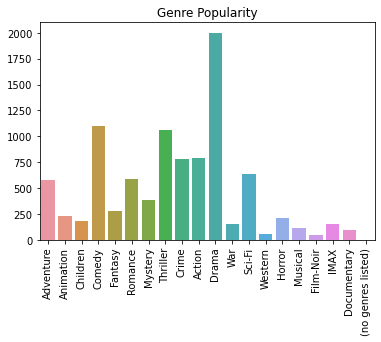

In [43]:
import seaborn as sns
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Genre Popularity')
plt.show()

Key Observations:

* The gragh shows that the genres "Drama" and "Comedy" are the most popular among the movies in the dataset, with significantly higher counts compared to other genres.

* Genres like "Action," "Thriller," and "Crime" have moderate levels of popularity, with counts falling somewhere between the most and least popular categories.
* Genres such as "Western," "Horror," "Musical," "Film-Noir," "IMAX," and "Documentary" have relatively low counts, indicating they are less frequently represented in the dataset.
* There is a category labeled "(no genres listed)" with a non-zero count, suggesting that some movies in the dataset might not have any associated genre information.

Analyzing the rating column

In [47]:
# checking value counts
df['rating'].value_counts()


4.0    999
5.0    883
3.5    577
4.5    496
3.0    274
2.0    102
2.5     80
1.0     31
1.5     26
0.5      8
Name: rating, dtype: int64

Plot the distribution of ratings:

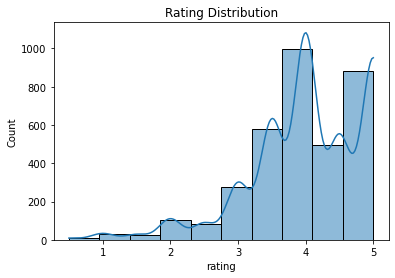

In [44]:
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Rating Distribution')
plt.show()

Key Observations:

The most frequent rating appears to be around 4.0, as indicated by the tallest bar in the histogram.

Find and plot the top-rated movies by the number of ratings

In [49]:
# Group by movie title and calculate the average rating
top_rated_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Get the top 10 movies
top_10_movies = top_rated_movies.head(10)

top_10_movies

title
(500) Days of Summer (2009)                    5.0
Star Trek: First Contact (1996)                5.0
Dead Man Walking (1995)                        5.0
Spider-Man 2 (2004)                            5.0
South Park: Bigger, Longer and Uncut (1999)    5.0
Sound of Music, The (1965)                     5.0
Dr. Horrible's Sing-Along Blog (2008)          5.0
Sixth Sense, The (1999)                        5.0
Elite Squad (Tropa de Elite) (2007)            5.0
Enchanted April (1992)                         5.0
Name: rating, dtype: float64

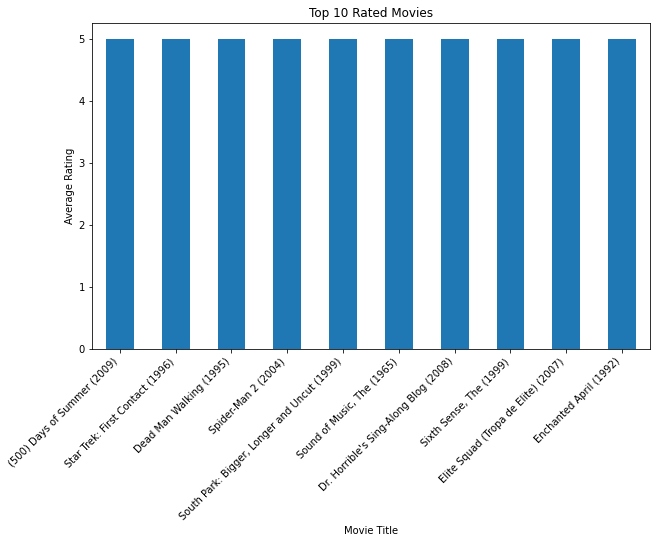

In [50]:
# Plot the top 10 rated movies
plt.figure(figsize=(10, 6))
top_10_movies.plot(kind='bar')
plt.title('Top 10 Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

Key Observations:

* All of the top 10 movies have a ratings of 5.0, indicating that they have received generally positive reviews from users.

* The gragh shows a diverse range of movie genres among the top 10, this suggests that users have varied preferences

## Data Preprocessing

In [119]:
df.head()

,userId,movieId,rating,title,genres,tag
0,336,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,474,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,567,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance,moldy
4,289,3,2.5,Grumpier Old Men (1995),Comedy|Romance,old


### Prepare User-Item Matrix

Creating a matrix where rows are users and columns are movies, with values being ratings

In [216]:
user_item_matrix = pd.pivot_table(train_data, index='userId', columns='movieId', values='rating')
user_item_matrix.head()



movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,4.0,3.5,4.0,4.0,NaN


In [215]:
#Fill remaining NaN(missing ) values with a chosen value(0)
user_item_matrix = user_item_matrix.fillna(0, axis=1)
user_item_matrix.head()

movieId,1,2,3,5,7,11,14,16,17,21,...,176371,176419,179401,180031,180985,183611,184471,187593,187595,193565
userId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,4.0,3.5,4.0,4.0,0.0


## Modeling

## Collaborative Filtering 

In [199]:
# import libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split


In [200]:
# Define the reader for Surprise
reader = Reader(rating_scale=(0, 5))

# Load data into Surprise's Dataset
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [201]:
# Here we Build a SVD model  and train it using the training set:
model = SVD()
model.fit(trainset)

In [206]:
from surprise.model_selection import cross_validate
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5745  0.6226  0.5281  0.5182  0.5881  0.5663  0.0387  
MAE (testset)     0.3573  0.3756  0.3344  0.3176  0.3597  0.3489  0.0204  
Fit time          0.29    0.27    0.25    0.23    0.23    0.25    0.02    
Test time         0.00    0.00    0.00    0.01    0.02    0.00    0.01    


{'test_rmse': array([0.57451555, 0.6226002 , 0.52807336, 0.51817129, 0.58811661]),
 'test_mae': array([0.35725266, 0.37560796, 0.33436674, 0.31763194, 0.35969492]),
 'fit_time': (0.2856478691101074,
  0.266340970993042,
  0.25372934341430664,
  0.23394036293029785,
  0.23303604125976562),
 'test_time': (0.0, 0.0, 0.0, 0.007210969924926758, 0.01667189598083496)}

In [207]:
from surprise import accuracy
# Make predictions on the test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)



RMSE: 0.4085


### Tuning SVD Model with GridSearchCV

In [217]:
from surprise.model_selection import GridSearchCV

In [218]:
# Define Hyperparameter Grid
param_grid = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.005, 0.01, 0.02]
}

In [219]:
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)

In [221]:
#Fit the GridSearchCV Object
gs.fit(data)

In [222]:
# Print best parameters and score
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.49957948443155376
{'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.02}


## Building a Content-Based Recommendation System

Content-based filtering recommends items to users based on their similarity to items the user has previously interacted with. In this case, we'll use the movie genres and tags to determine similarity.

In [223]:
# Import Necessary Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [225]:
def get_recommendations(movie_id):
    # Extract movie information
    movie_info = df[df['movieId'] == movie_id]

    # Concatenate genres and tags
    combined_features = movie_info['genres'] + ' ' + movie_info['tag']

    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the data
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_features)


    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Get index of the input movie
    movie_idx = df[df['movieId'] == movie_id].index[0]

    # Get similarity scores for the input movie
    similarities = cosine_sim[movie_idx]

    # Get top similar movies
    top_indices = similarities.argsort()[:-1][::-1]

    # Get recommended movie IDs
    recommended_movie_ids = df['movieId'].iloc[top_indices]

    return recommended_movie_ids